# 正則化

正則化を実装することで、過学習がどのように防げるのか検証  
2次元空間内のデータの回帰を想定

1. データ作成
2. 多項式回帰
3. 正則化項を実装

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. データ作成

$g(x)=x^3 + x^2 + x$ からデータを作成

In [2]:
def g(x):
    return 0.1*(x**3+x**2+x)

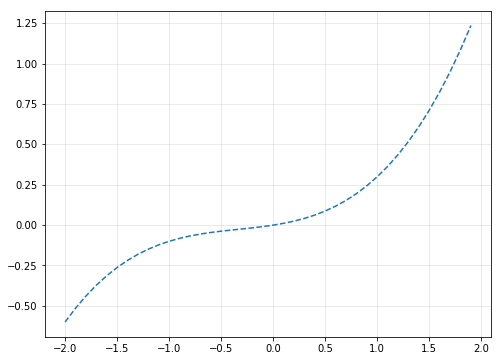

In [3]:
x=np.arange(-2,2,0.1)
plt.figure(figsize =(8,6))
plt.plot(x,g(x), linestyle="dashed")
plt.grid(color='gray', alpha=0.2)
plt.show()

### 説明変数作成

In [4]:
train_x=np.arange(-2,2,0.5)
train_x

array([-2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5])

### 目的変数作成

In [5]:
# データにノイズ付加
np.random.seed(0)
train_y=g(train_x)+np.random.randn(len(train_x))*0.05
train_y

array([-0.51179738, -0.24249214, -0.0510631 ,  0.07454466,  0.0933779 ,
        0.03863611,  0.34750442,  0.70493214])

### データをプロット

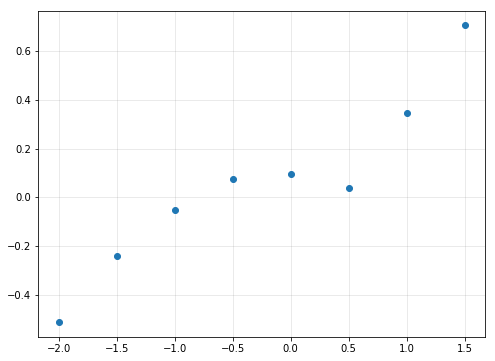

In [6]:
plt.figure(figsize =(8,6))
plt.plot(train_x,train_y,"o")
plt.grid(color='gray', alpha=0.2)
plt.show()

### 標準化

In [7]:
def standardize(x):
    return (x-x.mean())/x.std()

In [8]:
train_x=standardize(train_x)

In [9]:
train_x

array([-1.52752523, -1.09108945, -0.65465367, -0.21821789,  0.21821789,
        0.65465367,  1.09108945,  1.52752523])

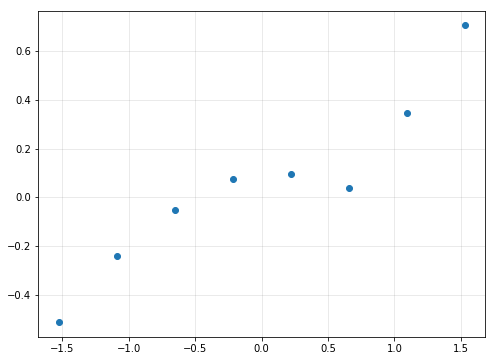

In [10]:
plt.figure(figsize =(8,6))
plt.plot(train_x,train_y,"o")
plt.grid(color='gray', alpha=0.2)
plt.show()

## 2. 多項式回帰
7次多項式での回帰

In [11]:
# 学習データの行列
def to_matrix(x):
    return np.vstack((np.ones(len(x)), x, x**2, x**3, x**4, x**5, x**6, x**7)).T

In [12]:
X=to_matrix(train_x)
X

array([[ 1.00000000e+00, -1.52752523e+00,  2.33333333e+00,
        -3.56422554e+00,  5.44444444e+00, -8.31652626e+00,
         1.27037037e+01, -1.94052279e+01],
       [ 1.00000000e+00, -1.09108945e+00,  1.19047619e+00,
        -1.29891601e+00,  1.41723356e+00, -1.54632859e+00,
         1.68718281e+00, -1.84086737e+00],
       [ 1.00000000e+00, -6.54653671e-01,  4.28571429e-01,
        -2.80565859e-01,  1.83673469e-01, -1.20242511e-01,
         7.87172012e-02, -5.15325047e-02],
       [ 1.00000000e+00, -2.18217890e-01,  4.76190476e-02,
        -1.03913281e-02,  2.26757370e-03, -4.94825148e-04,
         1.07979700e-04, -2.35631023e-05],
       [ 1.00000000e+00,  2.18217890e-01,  4.76190476e-02,
         1.03913281e-02,  2.26757370e-03,  4.94825148e-04,
         1.07979700e-04,  2.35631023e-05],
       [ 1.00000000e+00,  6.54653671e-01,  4.28571429e-01,
         2.80565859e-01,  1.83673469e-01,  1.20242511e-01,
         7.87172012e-02,  5.15325047e-02],
       [ 1.00000000e+00,  1.091089

In [13]:
# パラメータ初期化
np.random.seed(0)
theta=np.random.randn(len(X))
print("theta：",theta)

theta： [ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721]


In [14]:
# 仮説関数
def f(x):
    return np.dot(x, theta)

In [15]:
# 平均２乗誤差
def mse(x,y):
    return (1/len(x))*np.sum((y-f(x))**2)

### 学習

In [16]:
# 学習率
alpha=0.001
# 反復回数
iteration=1000

In [17]:
# パラメーター初期化
np.random.seed(1)
theta=np.random.randn(len(X))

loss_list=[]

for i in range(iteration):
    theta=theta-alpha*np.dot(f(X)-train_y,X)
    loss=mse(X,train_y)
    loss_list.append(mse(X,train_y))
    
    #log="{}回目 ： loss={:.3f}"
    #print(log.format(i+1,loss))

### loss曲線


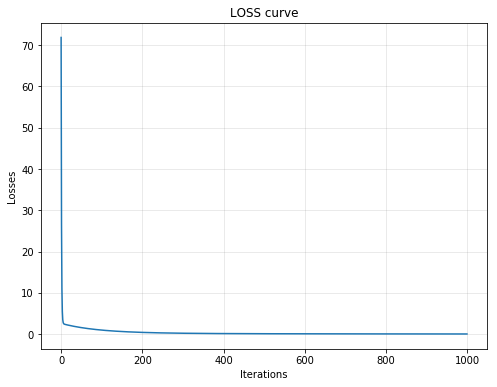

In [18]:
plt.figure(figsize =(8,6))
plt.plot(range(0,iteration),loss_list)
plt.title("LOSS curve")
plt.xlabel("Iterations")
plt.ylabel("Losses")
plt.grid(color='gray', alpha=0.2)
plt.show()

In [19]:
# 最終反復回数のlossを出力
loss_list[-1]

0.0532259301195983

### 多項式を描画

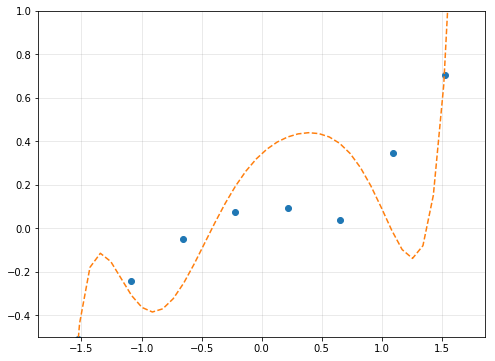

In [20]:
x=np.arange(-2,2,0.1)
x=standardize(x)

plt.figure(figsize =(8,6))
plt.plot(train_x,train_y,"o")
plt.plot(x,f(to_matrix(x)), linestyle="dashed")
plt.ylim(-0.5,1)
plt.grid(color='gray', alpha=0.2)
plt.show()

曲線が複雑で、過学習している。

## 3. 正則化項を実装
過学習の要因となっている説明変数に** ペナルティ（パラメータを小さくする）を与え、過学習を抑える。**

In [21]:
#  正則化定数
lam=1

# パラメーター初期化
np.random.seed(1)
theta=np.random.randn(X.shape[1])

# 平均２乗誤差（正則化項つき）
def mse(x,y):
    return (1/x.shape[0])*(np.sum((y-f(x))**2)+0.5*lam*np.sum(theta**2))

# 学習率
alpha=0.001
# 反復回数
iteration=1000

loss_list=[]

for i in range(iteration):
    #正則化項（バイアス項は正則化しないので0）
    reg_term=lam*np.hstack([0, theta[1:]])
    theta=theta-(alpha*np.dot(f(X)-train_y,X)+reg_term)
    loss=mse(X,train_y)
    loss_list.append(mse(X,train_y))
    
    #log="{}回目 ： loss={:.3f}"
    #print(log.format(i+1,loss))

### loss曲線

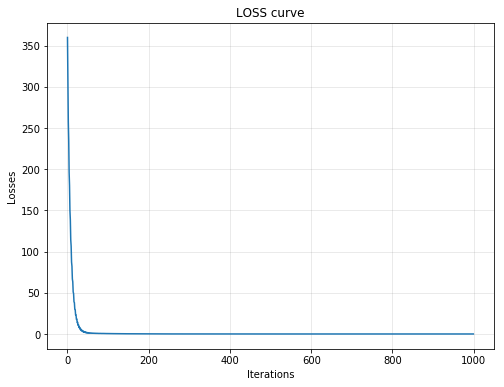

In [22]:
plt.figure(figsize =(8,6))
plt.plot(range(0,iteration),loss_list)
plt.title("LOSS curve")
plt.xlabel("Iterations")
plt.ylabel("Losses")
plt.grid(color='gray', alpha=0.2)
plt.show()

In [23]:
loss_list[-1]

0.04134448310188144

正則化項実装前に比べ、lossが小さくなった。

### 多項式を描画

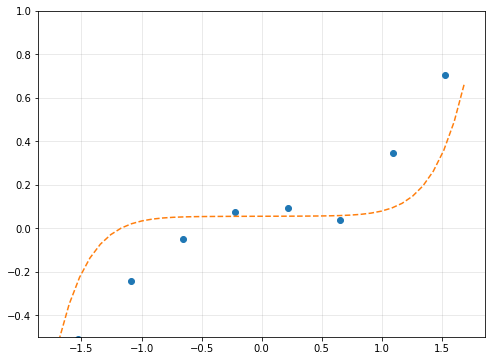

In [24]:
x=np.arange(-2,2,0.1)
x=standardize(x)

plt.figure(figsize =(8,6))
plt.plot(train_x,train_y,"o")
plt.plot(x,f(to_matrix(x)), linestyle="dashed")
plt.ylim(-0.5,1)
plt.grid(color='gray', alpha=0.2)
plt.show()

正則化項実装前に比べ、複雑さが緩和され、過学習が抑えられている。